In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#DATA : https://github.com/mwitiderrick/stockprice
dataset_train = pd.read_csv('NSE-TATAGLOBAL.csv')
dataset_train.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [ ]:
training_set = dataset_train.iloc[:, 1:2].values

In [ ]:
from sklearn.preprocessing import MinMaxScaler

#스케일링
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
#슬라이딩 윈도우
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
#상관관계 확인

corr = dataset_train.corr(method = 'pearson')
print(corr)



                          Open      High       Low      Last     Close  \
Open                  1.000000  0.999015  0.998825  0.997781  0.997840   
High                  0.999015  1.000000  0.998773  0.999155  0.999194   
Low                   0.998825  0.998773  1.000000  0.999051  0.999119   
Last                  0.997781  0.999155  0.999051  1.000000  0.999961   
Close                 0.997840  0.999194  0.999119  0.999961  1.000000   
Total Trade Quantity  0.385951  0.406405  0.380621  0.399328  0.398911   
Turnover (Lacs)       0.612877  0.630589  0.608502  0.624584  0.624213   

                      Total Trade Quantity  Turnover (Lacs)  
Open                              0.385951         0.612877  
High                              0.406405         0.630589  
Low                               0.380621         0.608502  
Last                              0.399328         0.624584  
Close                             0.398911         0.624213  
Total Trade Quantity              1

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.25))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.25))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.25))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
62/62 [==============================] - 21s 215ms/step - loss: 0.0141
Epoch 2/100
62/62 [==============================] - 12s 194ms/step - loss: 0.0035
Epoch 3/100
62/62 [==============================] - 14s 219ms/step - loss: 0.0035
Epoch 4/100
62/62 [==============================] - 12s 194ms/step - loss: 0.0026
Epoch 5/100
62/62 [==============================] - 13s 206ms/step - loss: 0.0029
Epoch 6/100
62/62 [==============================] - 12s 195ms/step - loss: 0.0028
Epoch 7/100
62/62 [==============================] - 12s 194ms/step - loss: 0.0023
Epoch 8/100
62/62 [==============================] - 12s 195ms/step - loss: 0.0024
Epoch 9/100
62/62 [==============================] - 13s 213ms/step - loss: 0.0021
Epoch 10/100
62/62 [==============================] - 12s 194ms/step - loss: 0.0022
Epoch 11/100
62/62 [==============================] - 12s 196ms/step - loss: 0.0020
Epoch 12/100
62/62 [==============================] - 12s 194ms/step - loss: 0.0019
E

In [ ]:
dataset_test = pd.read_csv('tatatest.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [ ]:

dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 2s 2s/step


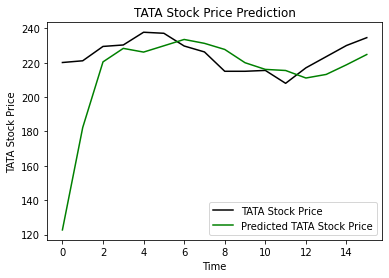

In [ ]:
plt.plot(real_stock_price, color = 'black', label = 'TATA Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()